# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [27]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [28]:
image = imread('data/image.jpg')

Analizala

Muestra la imagen para ver que se ha cargado bien

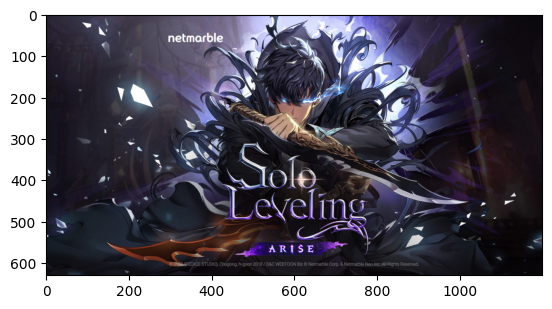

In [29]:
plt.imshow(image);

In [30]:
image

array([[[37, 34, 45],
        [37, 34, 45],
        [37, 33, 47],
        ...,
        [10, 10, 12],
        [10, 10, 12],
        [10, 10, 12]],

       [[37, 34, 45],
        [37, 33, 47],
        [37, 33, 47],
        ...,
        [10, 10, 12],
        [10, 10, 12],
        [10, 10, 12]],

       [[37, 33, 47],
        [37, 33, 47],
        [38, 34, 48],
        ...,
        [10, 10, 12],
        [10, 10, 12],
        [10, 10, 12]],

       ...,

       [[14, 12, 17],
        [14, 12, 17],
        [14, 12, 17],
        ...,
        [10,  8, 11],
        [10,  8, 11],
        [10,  8, 11]],

       [[14, 12, 17],
        [14, 12, 17],
        [14, 12, 17],
        ...,
        [10,  8, 11],
        [10,  8, 11],
        [10,  8, 11]],

       [[14, 12, 17],
        [15, 13, 18],
        [15, 13, 18],
        ...,
        [10,  8, 11],
        [10,  8, 11],
        [10,  8, 11]]], dtype=uint8)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [31]:
X = image.reshape(-1, 3)
X.shape

(756000, 3)

In [32]:
X

array([[37, 34, 45],
       [37, 34, 45],
       [37, 33, 47],
       ...,
       [10,  8, 11],
       [10,  8, 11],
       [10,  8, 11]], dtype=uint8)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [33]:
kmeans = KMeans(n_clusters=10, random_state=42)

In [34]:
labels = kmeans.fit_predict(X)
labels

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([9, 9, 9, ..., 3, 3, 3], dtype=int32)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [35]:
centroides = np.round(kmeans.cluster_centers_.astype(int), 2)

In [36]:
centroides

array([[115, 111, 159],
       [ 45,  41,  58],
       [201, 205, 238],
       [ 17,  13,  19],
       [168, 135, 118],
       [152, 152, 204],
       [240, 244, 248],
       [ 89,  86, 117],
       [ 67,  62,  82],
       [ 30,  27,  36]])

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [37]:
imagenRGB = np.reshape(centroides[labels], image.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

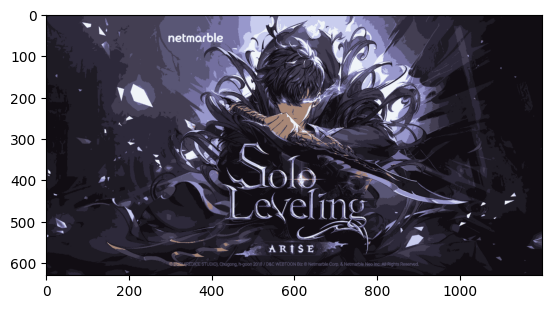

In [38]:
plt.imshow(imagenRGB);
plt.savefig('imagen_kmeans.png');

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


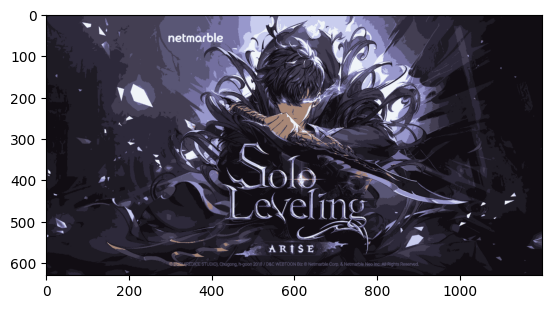

In [39]:
def imagen_kmeans(image, n_clusters):
    X = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=10, random_state=42)
    labels = kmeans.fit_predict(X)
    centroides = np.round(kmeans.cluster_centers_.astype(int), 2)
    imagenRGB = np.reshape(centroides[labels], image.shape)
    
    plt.savefig('imagen_kmeans.png')
    plt.imshow(imagenRGB)
    plt.show()
    
imagen_kmeans(image, 10)